<a href="https://colab.research.google.com/github/kimberlyydanij/python_demo/blob/master/python_26_pivot%EA%B3%BCpivot_table_%EB%8B%A4%EC%A4%91%EA%B3%B5%EC%84%A0%EC%84%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rfjnhbgmv ,     

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 3s (3,417 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [1]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/python_demo

Mounted at /content/drive
/content/drive/MyDrive/python_demo


In [2]:
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
plt.rc('font', family='NanumBarunGothic')

In [4]:
kmovies = pd.DataFrame({'MovieID':['1193','1194','1195'],
                        'Title':['디바','무림의 고수','정직한 후보'],
                        'Genres':['드라마','액션','코미디']})
 
kusers= pd.DataFrame({'UserID':[1,2,3,4,5],
                      'Gender':['F','M','M','F','M'],
                      'Age':[13,56,25,33,43]})
 
kratings= pd.DataFrame({'UserID':[1,1,1,2,2,2,3,3,3,4,4,4],
                        'MovieID':['1193','1194','1195','1193','1194','1195','1193','1194','1195','1193','1194','1195'],
                        'Rating':[2,5,None,3,1,5,None,2,5,5,None,3]})

In [5]:
print(type(kmovies))

<class 'pandas.core.frame.DataFrame'>


In [6]:
kmovies

,MovieID,Title,Genres
0,1193,디바,드라마
1,1194,무림의 고수,액션
2,1195,정직한 후보,코미디


In [7]:
kusers

,UserID,Gender,Age
0,1,F,13
1,2,M,56
2,3,M,25
3,4,F,33
4,5,M,43


In [8]:
kratings

,UserID,MovieID,Rating
0,1,1193,2.0
1,1,1194,5.0
2,1,1195,NaN
3,2,1193,3.0
4,2,1194,1.0
5,2,1195,5.0
6,3,1193,NaN
7,3,1194,2.0
8,3,1195,5.0
9,4,1193,5.0


In [11]:
kdata = kratings.merge(kusers).merge(kmovies)
kdata

,UserID,MovieID,Rating,Gender,Age,Title,Genres
0,1,1193,2.0,F,13,디바,드라마
1,2,1193,3.0,M,56,디바,드라마
2,3,1193,NaN,M,25,디바,드라마
3,4,1193,5.0,F,33,디바,드라마
4,1,1194,5.0,F,13,무림의 고수,액션
5,2,1194,1.0,M,56,무림의 고수,액션
6,3,1194,2.0,M,25,무림의 고수,액션
7,4,1194,NaN,F,33,무림의 고수,액션
8,1,1195,NaN,F,13,정직한 후보,코미디
9,2,1195,5.0,M,56,정직한 후보,코미디


In [13]:
krecom_data = kdata[['UserID', 'MovieID', 'Rating']].copy()
krecom_data

,UserID,MovieID,Rating
0,1,1193,2.0
1,2,1193,3.0
2,3,1193,NaN
3,4,1193,5.0
4,1,1194,5.0
5,2,1194,1.0
6,3,1194,2.0
7,4,1194,NaN
8,1,1195,NaN
9,2,1195,5.0


### pivot
- 각 컬럼의 값을 교차테이블 구성요소로 전달, 교차 테이블 완성
- index, columns, values 컬럼을 각각 전달
- 요약기능 없음
- dataframe.pivot(index,columns, values)[링크 텍스트](https://)

In [14]:
krecom_pivot = krecom_data.pivot(index='UserID', columns='MovieID', values='Rating')
krecom_pivot

MovieID,1193,1194,1195
UserID,,,
1,2.0,5.0,NaN
2,3.0,1.0,5.0
3,NaN,2.0,5.0
4,5.0,NaN,3.0


In [18]:
#inplace=True는 실제 데이터에 변경사항이 적용된다.
krecom_pivot.fillna(0, inplace=True)

In [19]:
krecom_pivot

MovieID,1193,1194,1195
UserID,,,
1,2.0,5.0,0.0
2,3.0,1.0,5.0
3,0.0,2.0,5.0
4,5.0,0.0,3.0


### pivot_table
- pivot기능과 유사, 더 많은 옵션 사용 가능
- index,columns, values 컬럼을 각각 전달
- aggfunc 옵션 사용하여 요약 기능 전달 가능(기본은 평균)
- fill_value 옵션 사용하여 NA값 대체 가능
- dataframe.pivot_table(index,columns,values,aggfunc='mean',fill_value)

In [22]:
krecom_pivot_table = krecom_data.pivot_table(index='UserID', columns='MovieID', values='Rating', aggfunc='min', fill_value=0)
krecom_pivot_table

MovieID,1193,1194,1195
UserID,,,
1,2,5,0
2,3,1,5
3,0,2,5
4,5,0,3


In [26]:
df = pd.DataFrame(data  = {'A':['foo','foo','foo','foo','foo','bar','bar','bar','bar'],
                           'B':['one','one','one','two','two','one','one','two','two'],
                           'C':['small','large','large','small','small','large','small','small','large'],
                           'D':[1,2,2,3,3,4,5,6,7],
                           'E':[2,4,5,5,6,6,8,9,9]})
print(df)

     A    B      C  D  E
0  foo  one  small  1  2
1  foo  one  large  2  4
2  foo  one  large  2  5
3  foo  two  small  3  5
4  foo  two  small  3  6
5  bar  one  large  4  6
6  bar  one  small  5  8
7  bar  two  small  6  9
8  bar  two  large  7  9


In [27]:
table = pd.pivot_table(df, values=['D','E'],index=['A','C'])
table

D         E
A   C                        
bar large  5.500000  7.500000
    small  5.500000  8.500000
foo large  2.000000  4.500000
    small  2.333333  4.333333

In [30]:
table = pd.pivot_table(df, values=['D','E'],index=['A','C'], aggfunc={'D': np.mean,
                                                                      'E':[min, max, np.mean]})                              
table

D    E               
               mean  max      mean  min
A   C                                  
bar large  5.500000  9.0  7.500000  6.0
    small  5.500000  9.0  8.500000  8.0
foo large  2.000000  5.0  4.500000  4.0
    small  2.333333  6.0  4.333333  2.0

In [31]:
a = np.array([5,6,9,2])

In [32]:
np.min(a)

2

In [33]:
np.max(a)

9

In [34]:
np.argmin(a)  #최소값이 있는 인덱스 반환    

3

In [35]:
np.argmax(a)  #최대대값이 있는 인덱스 반환    

2

### 다중공선성


In [40]:
from sklearn.datasets import load_iris, load_linnerud
data_iris = load_iris()

In [41]:
print(data_iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [44]:
data_pd = pd.DataFrame(data_iris.data, columns=data_iris.feature_names)

In [45]:
data_iris.target_names #종속변수

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [47]:
data_target = pd.DataFrame(data_iris.target, columns=['target'])

In [48]:
print(data_target.shape) # 종속변수
print(data_pd.shape)     # 독립변수

(150, 1)
(150, 4)


In [50]:
iris_ = pd.concat([data_pd, data_target], axis=1)
iris_.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [51]:
iris_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


다중공선성 : 종속변수를 설명하는 독립변수끼리 강한 선형관계가 있을 경우, 모델에 부정적인 영향을 미친다.  
             종속변수는 target, 독립변수는 feature를 의미한다.(통계용어)

In [52]:
#변수들의 상관계수
iris_.iloc[:,:-1].corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


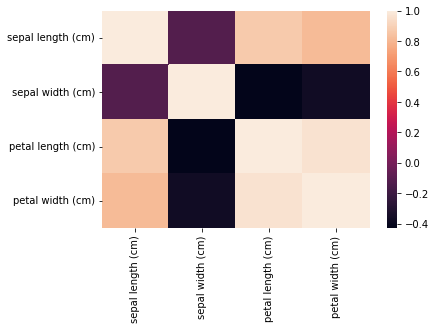

In [54]:
sns.heatmap(iris_.iloc[:,:-1].corr())